In [1]:

!pip install -q seaborn scikit-learn joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import joblib


In [2]:
df = pd.read_csv('/content/creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19898 entries, 0 to 19897
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    19898 non-null  int64  
 1   V1      19898 non-null  float64
 2   V2      19898 non-null  float64
 3   V3      19898 non-null  float64
 4   V4      19898 non-null  float64
 5   V5      19898 non-null  float64
 6   V6      19898 non-null  float64
 7   V7      19898 non-null  float64
 8   V8      19898 non-null  float64
 9   V9      19898 non-null  float64
 10  V10     19898 non-null  float64
 11  V11     19897 non-null  float64
 12  V12     19897 non-null  float64
 13  V13     19897 non-null  float64
 14  V14     19897 non-null  float64
 15  V15     19897 non-null  float64
 16  V16     19897 non-null  float64
 17  V17     19897 non-null  float64
 18  V18     19897 non-null  float64
 19  V19     19897 non-null  float64
 20  V20     19897 non-null  float64
 21  V21     19897 non-null  float64
 22

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,19898.000000,19898.000000,19898.000000,19898.000000,19898.000000,19898.000000,19898.000000,19898.000000,19898.000000,19898.000000,...,19897.000000,19897.000000,19897.000000,19897.000000,19897.000000,19897.000000,19897.000000,19897.000000,19897.000000,19897.000000
mean,15492.416374,-0.244326,0.242420,0.745774,0.277011,-0.163264,0.092881,-0.145279,0.022237,0.636382,...,-0.047949,-0.146461,-0.038093,0.010678,0.122924,0.033127,0.014454,0.007312,70.271100,0.004272
std,10512.066686,1.889986,1.527342,1.767726,1.466218,1.430821,1.331029,1.338260,1.346813,1.278839,...,0.828385,0.637567,0.520683,0.591180,0.437675,0.530315,0.393002,0.244372,205.363789,0.065222
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-32.092129,-23.496714,-26.548144,-41.484823,-7.175097,...,-20.262054,-8.593642,-26.751119,-2.728650,-7.495741,-1.338556,-8.567638,-3.575312,0.000000,0.000000
25%,4536.250000,-0.959632,-0.329008,0.309235,-0.636713,-0.745156,-0.657306,-0.599403,-0.171779,-0.209565,...,-0.259497,-0.563992,-0.174213,-0.333314,-0.138325,-0.341917,-0.069146,-0.010879,5.750000,0.000000
50%,14796.000000,-0.302521,0.220079,0.898672,0.224608,-0.199377,-0.175434,-0.072254,0.023822,0.620176,...,-0.115398,-0.118803,-0.046994,0.061181,0.160495,-0.036546,0.003868,0.019083,16.000000,0.000000
75%,26220.500000,1.164473,0.870117,1.532922,1.142143,0.341367,0.486735,0.448572,0.279960,1.409142,...,0.049521,0.254057,0.073666,0.398549,0.400713,0.332729,0.096281,0.077551,59.980000,0.000000
max,30633.000000,1.960497,16.713389,4.101716,11.927512,34.099309,21.393069,34.303177,20.007208,10.392889,...,22.614889,5.805795,13.876221,3.695503,5.525093,3.517346,8.254376,4.860769,7879.420000,1.000000


In [6]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [7]:
df.dropna(inplace=True)

In [8]:
print(df['Class'].value_counts())

Class
0.0    19812
1.0       85
Name: count, dtype: int64


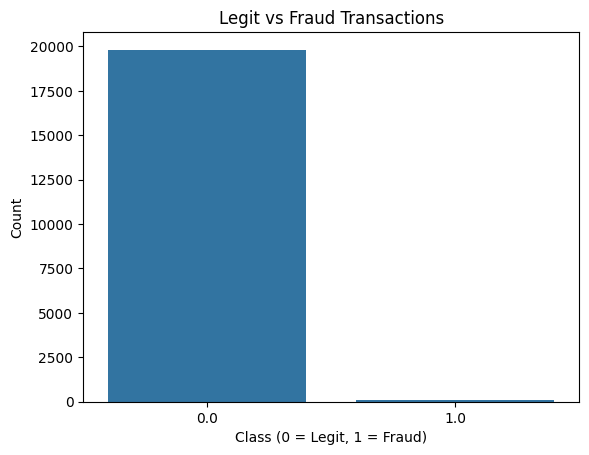

In [9]:
sns.countplot(x='Class', data=df)
plt.title("Legit vs Fraud Transactions")
plt.xlabel("Class (0 = Legit, 1 = Fraud)")
plt.ylabel("Count")
plt.show()


In [10]:
scaler = StandardScaler()
df['normalizedAmount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df = df.drop(['Amount', 'Time'], axis=1)


In [11]:
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [12]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [13]:
y_pred = model.predict(X_test)

In [15]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3963
         1.0       0.65      0.65      0.65        17

    accuracy                           1.00      3980
   macro avg       0.82      0.82      0.82      3980
weighted avg       1.00      1.00      1.00      3980

Confusion Matrix:


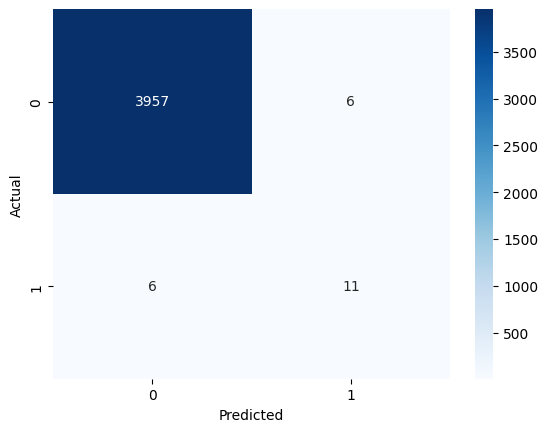

In [19]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [22]:
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

ROC AUC Score: 0.822772409493699


In [23]:
joblib.dump(model, 'fraud_model.pkl')


['fraud_model.pkl']

In [24]:
import gradio as gr
import joblib
import numpy as np

# Load the trained model
model = joblib.load("/content/fraud_model.pkl")

# Prediction function
def predict_fraud(*features):
    input_data = np.array(features).reshape(1, -1)
    prediction = model.predict(input_data)[0]
    return "⚠️ Fraudulent Transaction" if prediction == 1 else "✅ Legitimate Transaction"

# Feature names (28 PCA components + normalizedAmount)
feature_names = [
    "V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "V10",
    "V11", "V12", "V13", "V14", "V15", "V16", "V17", "V18", "V19", "V20",
    "V21", "V22", "V23", "V24", "V25", "V26", "V27", "V28", "Normalized Amount"
]

# Define input components
inputs = [gr.Number(label=fn) for fn in feature_names]
output = gr.Textbox(label="Prediction")

# Build interface
app = gr.Interface(
    fn=predict_fraud,
    inputs=inputs,
    outputs=output,
    title="💳 Credit Card Fraud Detection",
    description="Enter values for V1 to V28 and Normalized Amount to predict fraud.",
    allow_flagging="never",
    live=True  # Enables "Clear" button
)

# Launch the app
app.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ce114611880e1dea38.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
